# Global COVID-19 Mortality by Continent - Using Python/Pandas 
Dataset From https://covid.ourworldindata.org/data/owid-covid-data.csv

In [114]:
import pandas as pd


In [115]:
import matplotlib.pyplot as plt

In [116]:
import seaborn as sns

In [117]:
#Load The Data Set From Local Directory

In [118]:
get_filePath = pd.read_csv("owid-covid-data.csv")

In [119]:
Data = get_filePath

In [120]:
#Explore The Data Set

In [121]:
Data.shape

(323661, 67)

In [122]:
Data.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [123]:
Data.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [124]:
#DATA CLEANING - Remove Duplicates - Remove Missing Data - Fill Missing With 0

In [125]:
DataDrop = Data.drop_duplicates()

In [126]:
CleanData = DataDrop.dropna(axis=1, how='all')

In [127]:
CleanData = CleanData.fillna(0)

In [128]:

CleanData.fillna(0)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323656,ZWE,Africa,Zimbabwe,2023-07-01,265524.0,0.0,15.857,5707.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
323657,ZWE,Africa,Zimbabwe,2023-07-02,265524.0,0.0,15.857,5707.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
323658,ZWE,Africa,Zimbabwe,2023-07-03,265604.0,80.0,11.429,5709.0,2.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
323659,ZWE,Africa,Zimbabwe,2023-07-04,265604.0,0.0,11.429,5709.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0


In [129]:
CleanData.size

21685287

In [130]:
CleanData.isna().any().sum()

0

In [131]:
CleanData.isnull().any().sum()

0

In [132]:
# Remove duplicate rows
CleanData = CleanData.drop_duplicates()

# Reset the index after removing duplicates
CleanData = CleanData.reset_index(drop=True)

In [133]:
#Data Type Conversion - Float to Integers ~ Date to Date Time

In [134]:

CleanData = CleanData.astype({'total_cases':'int','new_cases':'int','new_cases_smoothed':'int','total_deaths':'int','new_deaths':'int','new_deaths_smoothed':'int','total_cases_per_million':'int','new_cases_per_million':'int','new_cases_smoothed_per_million':'int','total_deaths_per_million':'int','male_smokers':'int','handwashing_facilities':'int','hospital_beds_per_thousand':'int','life_expectancy':'int','population':'int','excess_mortality_cumulative_absolute':'int','excess_mortality':'int'})

In [135]:
CleanData['date'] = CleanData['date'].astype('datetime64[ns]')

In [136]:
CleanData.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                         int32
                                                ...      
population                                          int32
excess_mortality_cumulative_absolute                int32
excess_mortality_cumulative                       float64
excess_mortality                                    int32
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [137]:
#Filtering selected columns into a new dataframe

In [138]:
Filtered_Data = CleanData.filter(items = ['continent','location','date','total_cases','new_cases','total_deaths','new_deaths','population'])

In [139]:
Filtered_Data["continent"].value_counts()

Africa           72961
Europe           70071
Asia             64145
North America    52482
Oceania          30720
South America    17922
0                15360
Name: continent, dtype: int64

In [140]:
#Manipulating The Continent Column - Aim To Visiualize Total Deaths/Total Cases By Continents

In [141]:
ConFilter = Filtered_Data

In [142]:
XCont = Filtered_Data.continent.str.replace("0","No")

In [143]:
XCont.value_counts()

Africa           72961
Europe           70071
Asia             64145
North America    52482
Oceania          30720
South America    17922
Name: continent, dtype: int64

In [144]:
ConFilter['continent'] = XCont

In [145]:
ConFilter.head(2)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Asia,Afghanistan,2020-01-03,0,0,0,0,41128772
1,Asia,Afghanistan,2020-01-04,0,0,0,0,41128772


In [146]:
# Group the data by continents
grouped_data = ConFilter.groupby('continent')

In [147]:
grouped_data.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Asia,Afghanistan,2020-01-03,0,0,0,0,41128772
1,Asia,Afghanistan,2020-01-04,0,0,0,0,41128772
2,Asia,Afghanistan,2020-01-05,0,0,0,0,41128772
3,Asia,Afghanistan,2020-01-06,0,0,0,0,41128772
4,Asia,Afghanistan,2020-01-07,0,0,0,0,41128772
2560,Europe,Albania,2020-01-03,0,0,0,0,2842318
2561,Europe,Albania,2020-01-04,0,0,0,0,2842318
2562,Europe,Albania,2020-01-05,0,0,0,0,2842318
2563,Europe,Albania,2020-01-06,0,0,0,0,2842318
2564,Europe,Albania,2020-01-07,0,0,0,0,2842318


In [148]:
# Calculate the total cases per million people
total_cases = grouped_data['total_cases'].sum()


In [149]:
total_cases.head()

continent
Africa           9.455599e+09
Asia             1.339104e+11
Europe           1.375972e+11
North America    7.812620e+10
Oceania          5.804772e+09
Name: total_cases, dtype: float64

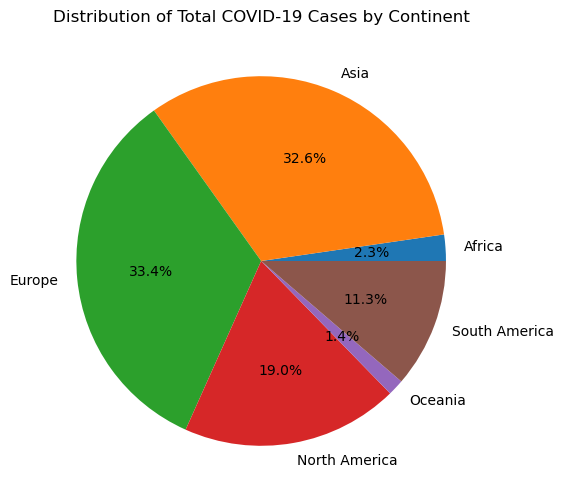

In [150]:
plt.figure(figsize=(10, 6))
plt.pie(total_cases, labels=total_cases.index, autopct='%1.1f%%')
plt.title('Distribution of Total COVID-19 Cases by Continent')
plt.show()

In [151]:
total_deaths = grouped_data['total_deaths'].sum()


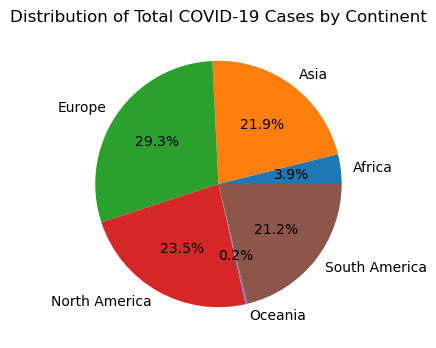

In [152]:
plt.figure(figsize=(6, 4))
plt.pie(total_deaths, labels=total_deaths.index, autopct='%1.1f%%')
plt.title('Distribution of Total COVID-19 Cases by Continent')
plt.show()

In [153]:
# Get the max cases per million people for each continent
cases_per_cont= ConFilter.groupby('continent')['total_cases'].max()



In [154]:
continent_death_rates = (
    ConFilter.groupby('continent')
    .agg({'total_deaths': 'sum', 'total_cases': 'sum'})
    .reset_index()
)

In [155]:
# Calculate Death Rates by Continent

continent_death_rates['death_rate'] = (continent_death_rates['total_deaths'] / continent_death_rates['total_cases']) * 100
continent_death_rates = continent_death_rates.sort_values('death_rate', ascending=False)



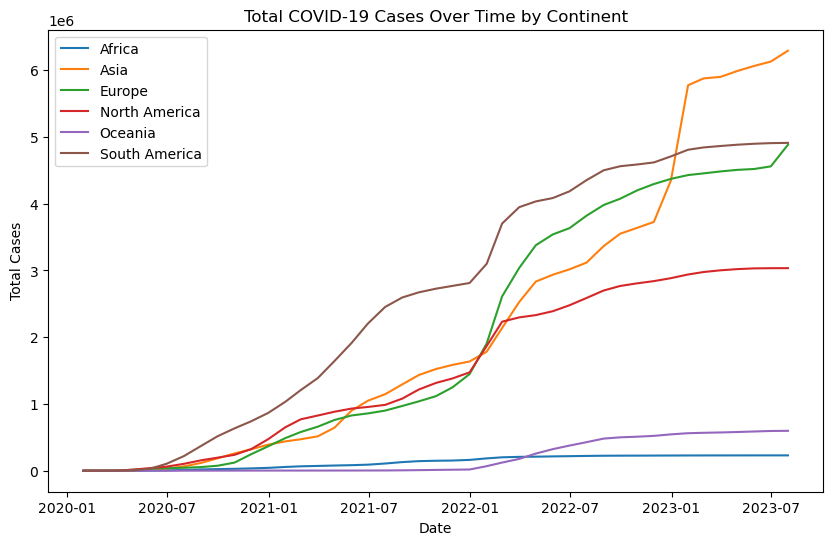

In [156]:
# Line plot of Total Cases Over Time by Continent
plt.figure(figsize=(10, 6))
for continent, data in grouped_data:
    resampled_data = data.resample('M', on='date').mean()
    plt.plot(resampled_data.index, resampled_data['total_cases'], label=continent)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time by Continent')
plt.legend()
plt.show()

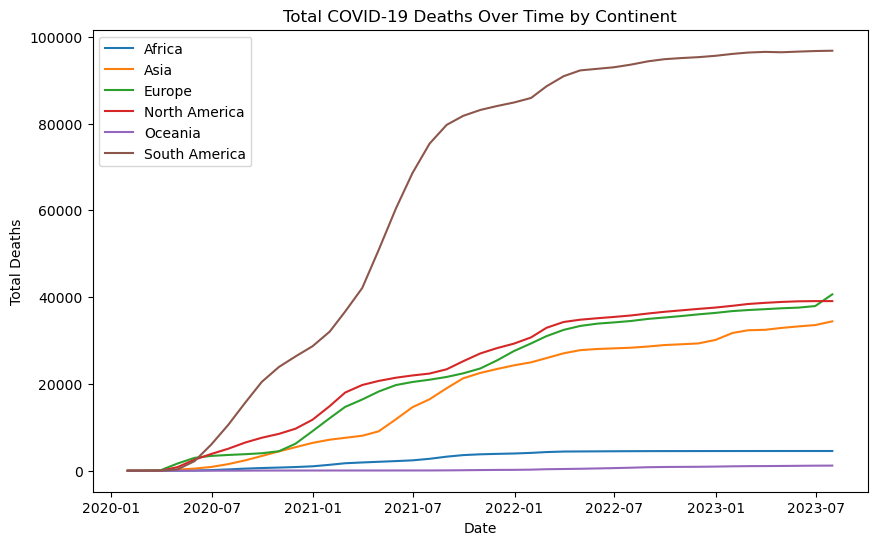

In [157]:
# Line plot of Total Deaths Over Time by Continent
plt.figure(figsize=(10, 6))
for continent, data in grouped_data:
    resampled_data = data.resample('M', on='date').mean()
    plt.plot(resampled_data.index, resampled_data['total_deaths'], label=continent)
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time by Continent')
plt.legend()
plt.show()